In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Gating Data
df = pd.read_excel('/content/All_Tests_Section_8_13_2024_3_03_21_PM.xlsx')

In [ ]:
df.shape

(689, 32)

In [ ]:
df.head(10)

,Invited_By_Email_Address,Appeared_On,Candidate_ID,Masked Full Name,Masked Email,Candidate_Status,Test_Id,Test_Name,Test_Status,Test_Link_Name,...,Applicant_ID,Percentile,Section_Name,Section_Score,Candidate_Section_Score,Questions,Not_Answered,Answered,Correct,Wrong
0,divya@imocha.io,13-Aug-2024 02:06 PM,10317211,Candidate 1,Candidate1@gmail.com,NaN,1164221,Manual Tester 2022,Completed,13th August 2024 _1,...,NaN,100,General Intelligence,20,12.00,20,0,20,12,8
1,divya@imocha.io,13-Aug-2024 07:36 PM,10317211,Candidate 1,Candidate1@gmail.com,NaN,1164221,Manual Tester 2022,Completed,13th August 2024 _1,...,NaN,100,Manual Testing,25,17.00,25,0,25,17,8
2,divya@imocha.io,14-Aug-2024 01:06 AM,10317211,Candidate 1,Candidate1@gmail.com,NaN,1164221,Manual Tester 2022,Completed,13th August 2024 _1,...,NaN,100,AI-evaluation: Speaking (General),10,3.72,1,0,1,1,0
3,hr@imocha.io,08-Aug-2024 02:42 PM,10302389,Candidate 2,Candidate2@imocha.io,NaN,1288118,iOS Developer - Swift,Completed,TEST_LINK,...,NaN,3,iOS Swift Coding,20,0.00,2,2,0,0,2
4,hr@imocha.io,08-Aug-2024 08:12 PM,10302389,Candidate 2,Candidate2@imocha.io,NaN,1288118,iOS Developer - Swift,Completed,TEST_LINK,...,NaN,3,SQL Coding,10,0.00,2,2,0,0,2
5,hr@imocha.io,09-Aug-2024 01:42 AM,10302389,Candidate 2,Candidate2@imocha.io,NaN,1288118,iOS Developer - Swift,Completed,TEST_LINK,...,NaN,3,Swift 5,10,4.00,10,0,10,4,6
6,hr@imocha.io,03-Jul-2024 03:48 PM,10183706,Candidate 3,Candidate3@gmail.com,NaN,1285244,AWS Cloud Architect,Completed,Demo Link,...,NaN,0,Ansible & Jenkins,10,1.00,10,9,1,1,0
7,hr@imocha.io,03-Jul-2024 09:18 PM,10183706,Candidate 3,Candidate3@gmail.com,NaN,1285244,AWS Cloud Architect,Completed,Demo Link,...,NaN,0,AWS LogicBox,5,0.00,1,1,0,0,1
8,hr@imocha.io,04-Jul-2024 02:48 AM,10183706,Candidate 3,Candidate3@gmail.com,NaN,1285244,AWS Cloud Architect,Completed,Demo Link,...,NaN,0,Amazon Web Services (AWS),10,0.00,10,8,2,0,2
9,hr@imocha.io,04-Jul-2024 08:18 AM,10183706,Candidate 3,Candidate3@gmail.com,NaN,1285244,AWS Cloud Architect,Completed,Demo Link,...,NaN,0,"Coding - Java, Python",15,0.00,1,0,1,0,0


### Column Types

- **Numerical** - Candidate_ID, Test_Score, Candidate_Score, Test_Negative_Points, Percentage, Total_Questions, Test_Duration(minutes), Time_Taken(minutes), Window_Violation, Time_Violation(seconds), Percentile, Section_Score, Candidate_Section_Score, Questions, Not_Answered, Answered, Correct, Wrong
- **Categorical** - Invited_By_Email_Address, Test_Id, Test_Name, Test_Status, Test_Link_Name, Performance_Category, Candidate_Feedback, Proctoring_Flag,
- **Mixed** - Appeared_On, Masked Full Name, Masked Email, Section_Name
- **No_data** - Candidate_Status, Applicant_ID

# Observation -

### Performance_Category


1.   This column based on Percentage Column
    

```
    70 > Proficient
    50 > Experienced
    25 > Intermediate
    25 < Beginner
```









# 1. Basic Data Cleaning and Exploration
### • Question 1: Clean the dataset by handling missing values and any inconsistencies (e.g., for "Candidate_Status" or "Test_Status").

In [ ]:
df['Performance_Category'].unique()

array(['Experienced', 'Beginner', 'Intermediate', 'Proficient'],
      dtype=object)

In [ ]:

def Fillna_Candidate_Status(row):
    test_status = str(row.get('Test_Status', '')).strip().lower()
    performance_category = str(row.get('Performance_Category', '')).strip()

    if test_status == 'completed' and performance_category in ['Proficient', 'Experienced']:
        return 'Qualified'
    elif test_status == 'completed' and performance_category in ['Beginner', 'Intermediate']:
        return 'Unqualified'
    elif test_status == 'test left':
        return 'Withdraw'
    elif test_status == 'terminated':
        return 'Terminated'
    else:
        return row.get('Candidate_Status', '')


df['Candidate_Status'] = df.apply(Fillna_Candidate_Status, axis=1)



In [ ]:
pd.set_option('display.max_columns', None)


In [ ]:
df

,Invited_By_Email_Address,Appeared_On,Candidate_ID,Masked Full Name,Masked Email,Candidate_Status,Test_Id,Test_Name,Test_Status,Test_Link_Name,Test_Score,Candidate_Score,Test_Negative_Points,Percentage,Performance_Category,Total_Questions,Test_Duration(minutes),Time_Taken(minutes),Candidate_Feedback,Proctoring_Flag,Window_Violation,Time_Violation(seconds),Applicant_ID,Percentile,Section_Name,Section_Score,Candidate_Section_Score,Questions,Not_Answered,Answered,Correct,Wrong
0,divya@imocha.io,13-Aug-2024 02:06 PM,10317211,Candidate 1,Candidate1@gmail.com,Qualified,1164221,Manual Tester 2022,Completed,13th August 2024 _1,55,32.72,0,59,Experienced,46,60,46,Great,Green,0,0,NaN,100,General Intelligence,20,12.00,20,0,20,12,8
1,divya@imocha.io,13-Aug-2024 07:36 PM,10317211,Candidate 1,Candidate1@gmail.com,Qualified,1164221,Manual Tester 2022,Completed,13th August 2024 _1,55,32.72,0,59,Experienced,46,60,46,Great,Green,0,0,NaN,100,Manual Testing,25,17.00,25,0,25,17,8
2,divya@imocha.io,14-Aug-2024 01:06 AM,10317211,Candidate 1,Candidate1@gmail.com,Qualified,1164221,Manual Tester 2022,Completed,13th August 2024 _1,55,32.72,0,59,Experienced,46,60,46,Great,Green,0,0,NaN,100,AI-evaluation: Speaking (General),10,3.72,1,0,1,1,0
3,hr@imocha.io,08-Aug-2024 02:42 PM,10302389,Candidate 2,Candidate2@imocha.io,Unqualified,1288118,iOS Developer - Swift,Completed,TEST_LINK,40,4.00,0,10,Beginner,14,60,1,Neutral,NaN,0,0,NaN,3,iOS Swift Coding,20,0.00,2,2,0,0,2
4,hr@imocha.io,08-Aug-2024 08:12 PM,10302389,Candidate 2,Candidate2@imocha.io,Unqualified,1288118,iOS Developer - Swift,Completed,TEST_LINK,40,4.00,0,10,Beginner,14,60,1,Neutral,NaN,0,0,NaN,3,SQL Coding,10,0.00,2,2,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,hr@imocha.io,11-Mar-2023 02:52 AM,8107534,Candidate 198,Candidate198@imocha.io,Unqualified,1236646,Senior Java Developer,Completed,Test,60,2.00,0,3,Beginner,14,77,7,Great,Green,0,0,NaN,2,Coding - Java,35,0.00,2,1,1,0,2
685,hr@imocha.io,11-Mar-2023 08:22 AM,8107534,Candidate 198,Candidate198@imocha.io,Unqualified,1236646,Senior Java Developer,Completed,Test,60,2.00,0,3,Beginner,14,77,7,Great,Green,0,0,NaN,2,Video Interview,10,0.00,1,0,1,0,1
686,hr@imocha.io,11-Mar-2023 01:52 PM,8107534,Candidate 198,Candidate198@imocha.io,Unqualified,1236646,Senior Java Developer,Completed,Test,60,2.00,0,3,Beginner,14,77,7,Great,Green,0,0,NaN,2,Java AI-LogicBox,5,0.00,1,1,0,0,1
687,hr@imocha.io,25-Jan-2023 07:39 PM,7851120,Candidate 199,Candidate199@imocha.io,Unqualified,1232738,GalaxE Sol Test,Completed,Test,35,2.00,0,6,Beginner,8,25,2,Great,NaN,0,0,NaN,2,AI-evaluation: Writing (General),30,0.00,3,0,3,0,3


In [ ]:
df['Candidate_Status'].shape

(689,)

In [ ]:
df['Candidate_Status'].value_counts()

,count
Candidate_Status,
Unqualified,456
Qualified,218
Withdraw,12
Terminated,3


In [ ]:
df['Test_Status'].value_counts()

,count
Test_Status,
Completed,674
Test Left,12
Terminated,3


## • Question 2: Identify the number of unique candidates who appeared for the exam

In [ ]:
len(df['Candidate_ID'].unique())

208

In [ ]:
df.groupby('Test_Name')['Candidate_ID'].count().sort_values(ascending=False)

,Candidate_ID
Test_Name,
MBA Interns,429
Technical Customer Support-L1,242
AWS Cloud Architect,6
Senior Java Developer,4
Manual Tester 2022,3
iOS Developer - Swift,3
GalaxE Sol Test,2


# • Question 3: Calculate the following statistics for Test_Score, Candidate_Score, Percentage, and Time_Taken(minutes):
Mean,
Median,
Standard Deviation,
Maximum and Minimum values

In [ ]:
df[['Test_Score', 'Candidate_Score', 'Percentage', 'Time_Taken(minutes)']].describe().loc[['mean', '50%', 'std', 'max', 'min']]


,Test_Score,Candidate_Score,Percentage,Time_Taken(minutes)
mean,41.399129,16.859042,41.744557,34.637155
50%,35.000000,17.250000,43.000000,37.000000
std,8.343919,6.352915,15.430312,8.432641
max,60.000000,32.720000,77.000000,46.000000
min,35.000000,1.000000,2.000000,1.000000


# 3. Performance Analysis


### • Question 4: Calculate the overall average score of candidates.


In [ ]:
df['Test_Name'].value_counts()

,count
Test_Name,
MBA Interns,429
Technical Customer Support-L1,242
AWS Cloud Architect,6
Senior Java Developer,4
Manual Tester 2022,3
iOS Developer - Swift,3
GalaxE Sol Test,2


In [ ]:
Test_avg = df.groupby('Test_Name')['Candidate_Score'].mean().sort_values(ascending=False)

In [ ]:
Test_avg

,Candidate_Score
Test_Name,
Manual Tester 2022,32.720000
Technical Customer Support-L1,19.011322
MBA Interns,16.053566
iOS Developer - Swift,4.000000
GalaxE Sol Test,2.000000
Senior Java Developer,2.000000
AWS Cloud Architect,1.000000


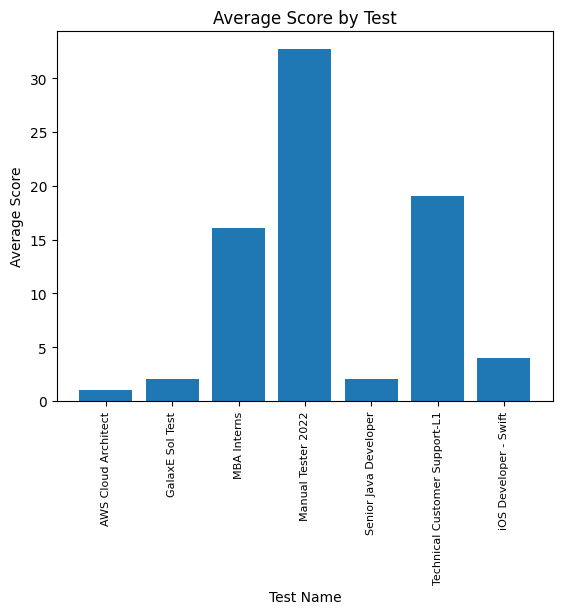

In [ ]:
plt.bar(Test_avg.index, Test_avg.values)
plt.xticks(rotation=90,size=8)
plt.xlabel('Test Name')
plt.ylabel('Average Score')
plt.title('Average Score by Test')
plt.show()

## • Question 5: Group the candidates by their Performance_Category (e.g., Experienced, Beginner) and calculate the average scores within each category.

In [ ]:
result = df.groupby('Performance_Category')['Candidate_Score'].mean()

In [ ]:
result

,Candidate_Score
Performance_Category,
Beginner,6.628602
Experienced,22.361907
Intermediate,16.165000
Proficient,27.080000


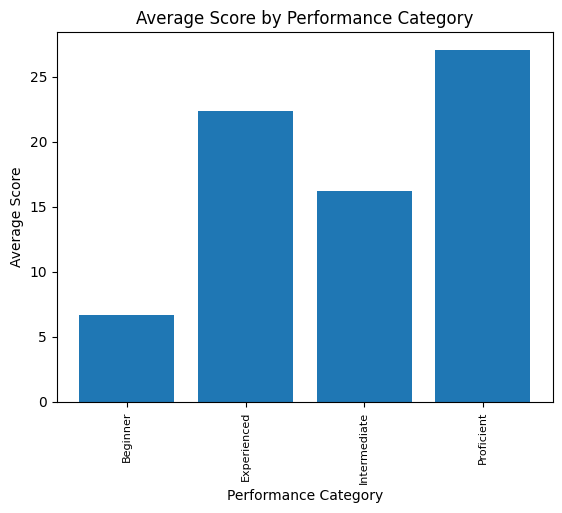

In [ ]:
plt.bar(result.index, result.values)
plt.xticks(rotation=90,size=8)
plt.xlabel('Performance Category')
plt.ylabel('Average Score')
plt.title('Average Score by Performance Category')
plt.show()

## • Question 6: Analyze the number of correct, wrong, and unanswered questions for each candidate.
Task: Create a stacked bar chart showing the distribution of answers (correct, wrong, unanswered) for each
section of the test (Section_Name).

In [ ]:
result = df.groupby('Candidate_ID')[['Correct','Wrong','Not_Answered']].sum()
result

,Correct,Wrong,Not_Answered
Candidate_ID,,,
7851120,2,6,0
8107534,2,8,6
9683729,14,11,0
9683733,10,10,6
9684693,13,12,1
...,...,...,...
9748690,18,8,0
9827849,15,9,2
10183706,1,4,18


<Axes: xlabel='Section_Name'>

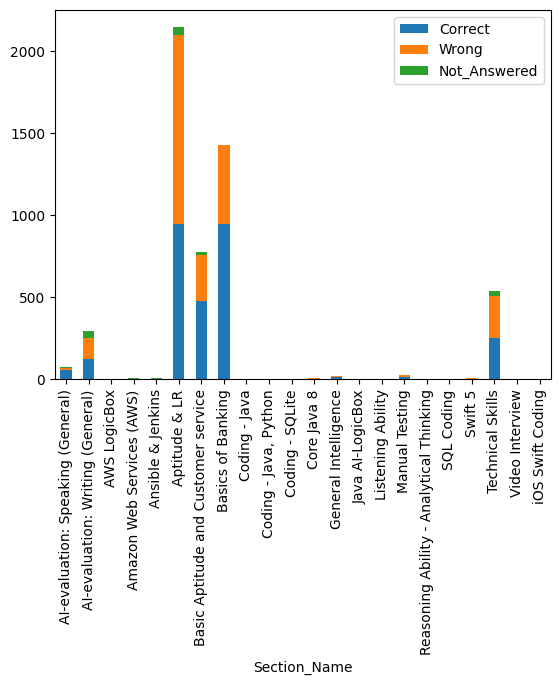

In [ ]:
df.groupby('Section_Name')[['Correct','Wrong','Not_Answered']].sum().plot(kind='bar', stacked=True)

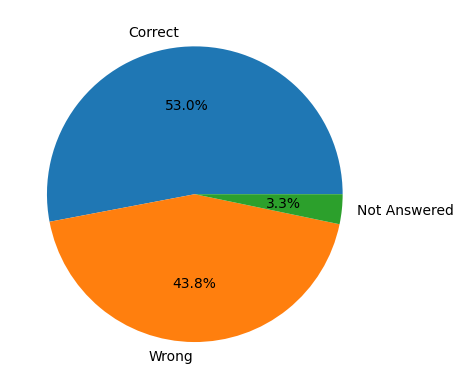

In [ ]:
lable = ['Correct', 'Wrong', 'Not Answered']
plt.pie(result.sum(), labels=lable, autopct='%1.1f%%')
plt.show()

## • Question 7: Identify which test sections (e.g., "General Intelligence," "Manual Testing") had the highest average score.

Task: Create a heatmap or bar plot comparing the average scores by Section_Name.


In [ ]:
result = df.groupby('Section_Name')['Candidate_Score'].mean().sort_values(ascending=False)
result

,Candidate_Score
Section_Name,
Manual Testing,32.720000
General Intelligence,32.720000
Listening Ability,23.750000
Technical Skills,18.971833
Basic Aptitude and Customer service,18.971833
AI-evaluation: Speaking (General),18.554583
AI-evaluation: Writing (General),16.866340
Aptitude & LR,16.053566
Basics of Banking,16.053566


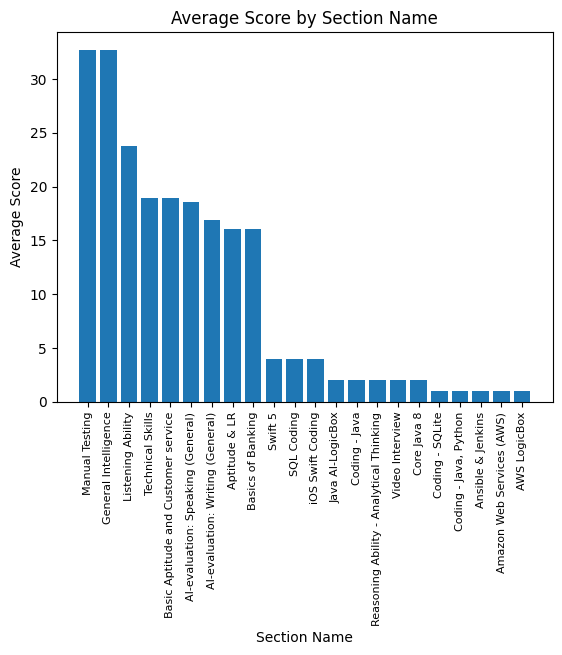

In [ ]:
plt.bar(result.index, result.values)
plt.xticks(rotation=90,size=8)
plt.xlabel('Section Name')
plt.ylabel('Average Score')
plt.title('Average Score by Section Name')
plt.show()

<Axes: ylabel='Section_Name'>

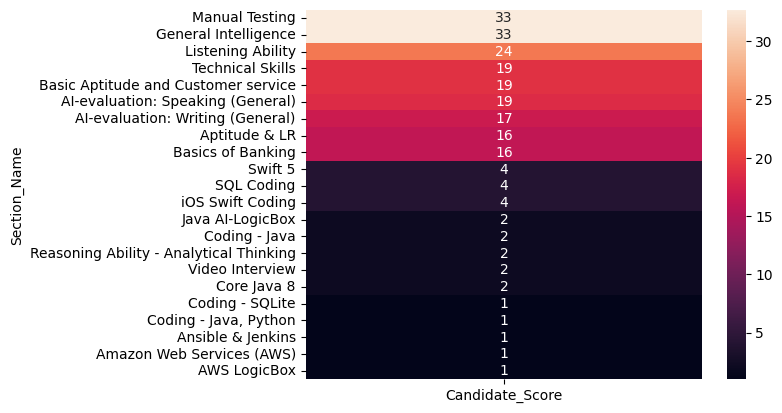

In [ ]:
sns.heatmap(result.to_frame(), annot=True)

# 5. Time Analysis


## • Question 8: What is the average time taken by candidates to complete the test? How does this vary across different Section_Name?
Task: Create a scatter plot or box plot showing the distribution of time taken across sections.



In [ ]:
average_time = df.groupby('Section_Name')['Time_Taken(minutes)'].mean()
average_time

,Time_Taken(minutes)
Section_Name,
AI-evaluation: Speaking (General),34.458333
AI-evaluation: Writing (General),35.237113
AWS LogicBox,7.000000
Amazon Web Services (AWS),7.000000
Ansible & Jenkins,7.000000
Aptitude & LR,35.272727
Basic Aptitude and Customer service,35.150000
Basics of Banking,35.272727
Coding - Java,7.000000


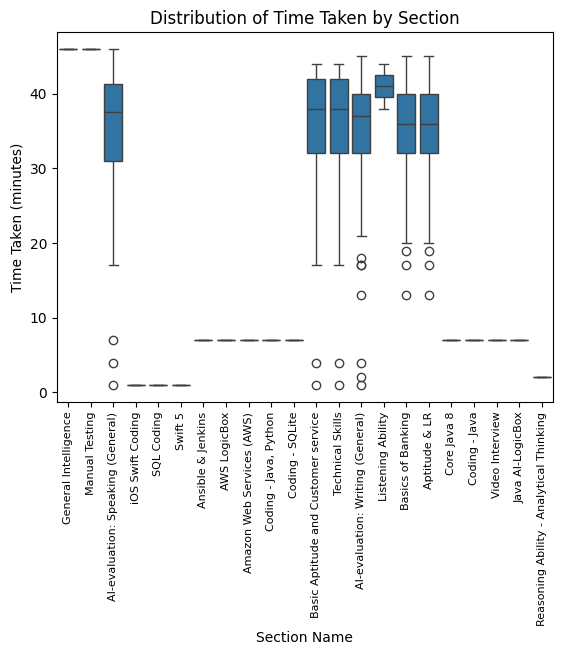

In [ ]:

sns.boxplot(x='Section_Name', y='Time_Taken(minutes)', data=df)
plt.xticks(rotation=90, size=8)
plt.xlabel('Section Name')
plt.ylabel('Time Taken (minutes)')
plt.title('Distribution of Time Taken by Section')
plt.show()


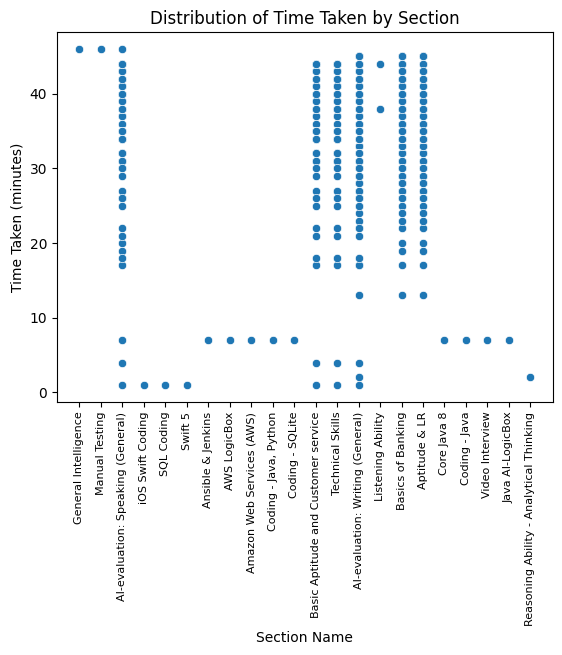

In [ ]:
sns.scatterplot(x='Section_Name', y='Time_Taken(minutes)', data=df)
plt.xticks(rotation=90, size=8)
plt.xlabel('Section Name')
plt.ylabel('Time Taken (minutes)')
plt.title('Distribution of Time Taken by Section')
plt.show()

## • Question 9: Analyze if there is a correlation between Time_Taken(minutes) and Candidate_Score.
Task: Create a scatter plot and calculate the correlation coefficient. Discuss the findings.

In [ ]:
correlation = df['Time_Taken(minutes)'].corr(df['Candidate_Score'])
print(f"Correlation coefficient: {correlation}")

Correlation coefficient: 0.4822131899023007


Text(0.5, 1.0, 'Time Taken vs. Candidate Score')

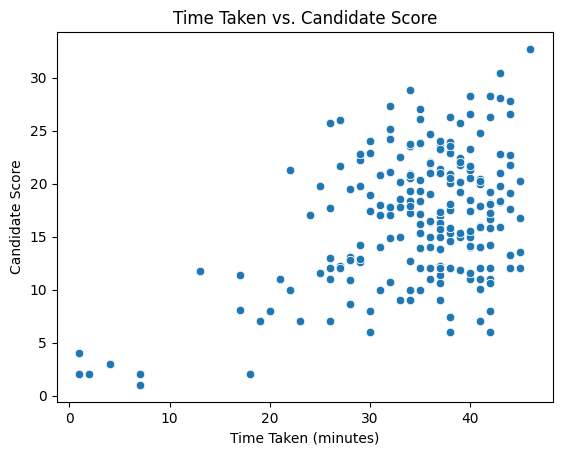

In [ ]:
sns.scatterplot(x='Time_Taken(minutes)', y='Candidate_Score', data=df)
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Candidate Score')
plt.title('Time Taken vs. Candidate Score')

# 6. Test Status and Feedback


## Question 10: Analyze the distribution of candidates' feedback (Candidate_Feedback) and its relationship with test scores

In [ ]:
df['Candidate_Feedback'].isna().sum()

70

In [ ]:
df['Candidate_Feedback'].value_counts()

,count
Candidate_Feedback,
Great,448
Neutral,165
Not Good,6


In [ ]:
temp = df['Candidate_Feedback'].mode()[0]
temp

'Great'

In [ ]:
df['Candidate_Feedback'] = df['Candidate_Feedback'].fillna(temp)

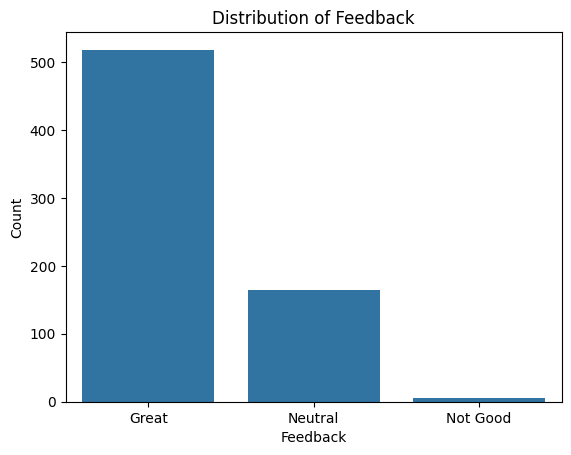

In [ ]:
sns.countplot(x='Candidate_Feedback', data=df)
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.title('Distribution of Feedback')
plt.show()

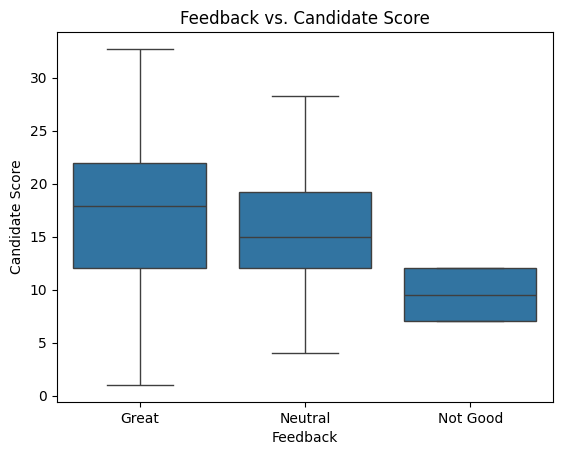

In [ ]:
sns.boxplot(x='Candidate_Feedback', y='Candidate_Score', data=df)
plt.xlabel('Feedback')
plt.ylabel('Candidate Score')
plt.title('Feedback vs. Candidate Score')
plt.show()

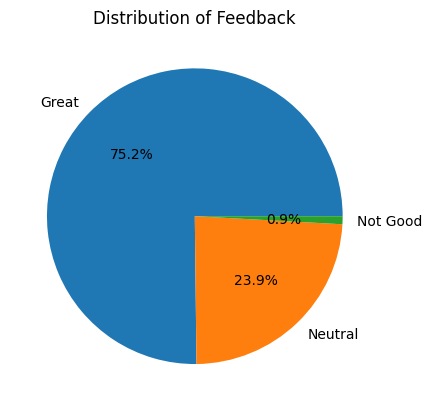

In [ ]:
plt.pie(df['Candidate_Feedback'].value_counts(), labels=df['Candidate_Feedback'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Feedback')
plt.show()

## • Question 11: How many candidates violated the time window or had time violations (Time_Violation) during the exam?
Task: Create a count of candidates who had violations and present a pie chart showing the proportion of
candidates with and without violations.

In [ ]:
result = df[df['Time_Violation(seconds)'] > 0].shape[0]
result

80

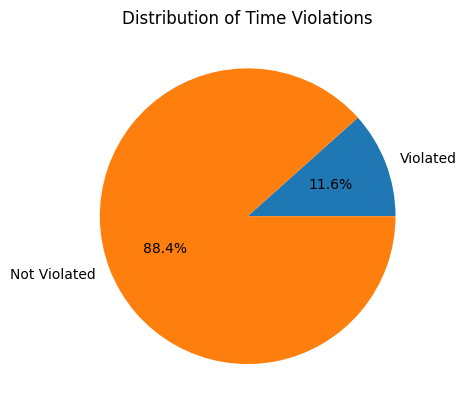

In [ ]:
plt.pie([result, df.shape[0] - result], labels=['Violated', 'Not Violated'], autopct='%1.1f%%')
plt.title('Distribution of Time Violations')
plt.show()

# 7. Percentile and Test Performance

## • Question 12: Examine the relationship between Percentile and Candidate_Score.
Task: Create a line chart showing the distribution of scores across different percentiles

In [ ]:
result = df.groupby('Percentile')['Candidate_Score'].mean()
result

,Candidate_Score
Percentile,
0,1.000000
2,2.222222
3,4.000000
4,6.000000
6,7.000000
...,...
96,27.245714
97,27.955000
98,28.275000


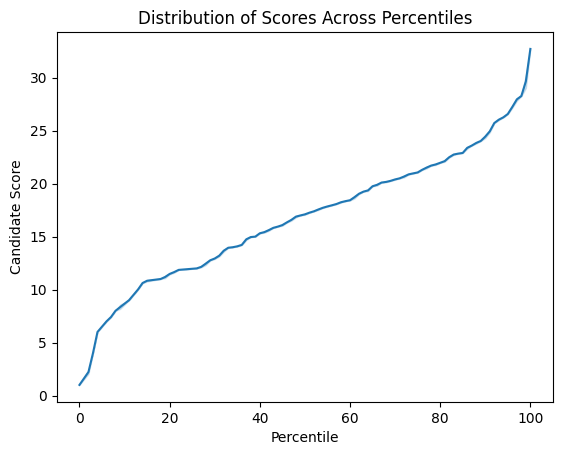

In [ ]:
sns.lineplot(x='Percentile', y='Candidate_Score', data=df)
plt.xlabel('Percentile')
plt.ylabel('Candidate Score')
plt.title('Distribution of Scores Across Percentiles')
plt.show()

## • Question 13: Are there any noticeable trends between the Test_Score and Percentile for different sections?
Task: Plot a heatmap showing the relationship between Test_Score and Percentile across different
Section_Name.

In [ ]:
result = df.groupby(['Section_Name', 'Percentile'])['Test_Score'].mean().unstack()
result

Percentile,0,2,3,4,6,7,8,9,11,13,14,15,18,19,20,21,22,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
Section_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AI-evaluation: Speaking (General),55.0,52.00,NaN,52.000000,43.500000,NaN,35.0,52.0,52.000000,52.000000,52.0,NaN,52.000000,NaN,52.0,52.0,NaN,NaN,NaN,NaN,NaN,35.0,NaN,NaN,52.0,52.000000,52.0,35.0,52.0,NaN,NaN,NaN,35.0,NaN,NaN,52.0,NaN,NaN,52.0,NaN,NaN,52.0,52.000000,52.0,52.0,52.0,NaN,52.0,43.5,NaN,52.0,NaN,35.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,NaN,52.0,NaN,52.0,NaN,52.000000,52.0,NaN,52.0,NaN,NaN,52.000000,NaN,52.0,52.0,52.0,43.5,52.0,52.000000,52.0,52.0,52.0,43.5,52.0,52.0,52.0,52.0,52.0,52.0,52.0,55.0
AI-evaluation: Writing (General),NaN,47.75,NaN,40.666667,40.666667,35.0,35.0,43.5,40.666667,37.833333,43.5,35.0,37.833333,35.0,43.5,43.5,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,52.0,40.666667,43.5,35.0,43.5,35.0,35.0,35.0,35.0,35.0,35.0,43.5,35.0,35.0,43.5,35.0,35.0,43.5,46.333333,43.5,43.5,43.5,35.0,43.5,52.0,35.0,52.0,35.0,35.0,43.5,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,43.5,35.0,52.0,35.0,46.333333,43.5,35.0,43.5,35.0,35.0,40.666667,35.0,52.0,43.5,52.0,43.5,43.5,40.666667,43.5,43.5,43.5,52.0,52.0,43.5,52.0,43.5,52.0,52.0,52.0,NaN
AWS LogicBox,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amazon Web Services (AWS),55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ansible & Jenkins,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aptitude & LR,NaN,NaN,NaN,35.000000,35.000000,35.0,35.0,35.0,35.000000,35.000000,35.0,35.0,35.000000,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,NaN,35.000000,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.000000,35.0,35.0,35.0,35.0,35.0,35.0,35.0,NaN,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,NaN,35.0,35.000000,35.0,35.0,35.0,35.0,35.0,35.000000,35.0,NaN,35.0,NaN,35.0,35.0,35.000000,35.0,35.0,35.0,35.0,NaN,35.0,NaN,35.0,NaN,NaN,NaN,NaN
Basic Aptitude and Customer service,NaN,52.00,NaN,52.000000,52.000000,NaN,NaN,52.0,52.000000,52.000000,52.0,NaN,52.000000,NaN,52.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,52.000000,52.0,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN,52.0,NaN,NaN,52.0,NaN,NaN,52.0,52.000000,52.0,52.0,52.0,NaN,52.0,52.0,NaN,52.0,NaN,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,NaN,52.0,NaN,52.000000,52.0,NaN,52.0,NaN,NaN,52.000000,NaN,52.0,52.0,52.0,52.0,52.0,52.000000,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,NaN
Basics of Banking,NaN,NaN,NaN,35.000000,35.000000,35.0,35.0,35.0,35.000000,35.000000,35.0,35.0,35.000000,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,NaN,35.000000,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.000000,35.0,35.0,35.0,35.0,35.0,35.0,35.0,NaN,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,NaN,35.0,35.000000,3

In [ ]:
pivot_table = df.pivot_table(index='Section_Name', values=["Test_Score", "Percentile"])
pivot_table


,Percentile,Test_Score
Section_Name,,
AI-evaluation: Speaking (General),59.111111,49.722222
AI-evaluation: Writing (General),50.536082,40.257732
AWS LogicBox,0.000000,55.000000
Amazon Web Services (AWS),0.000000,55.000000
Ansible & Jenkins,0.000000,55.000000
Aptitude & LR,46.279720,35.000000
Basic Aptitude and Customer service,61.166667,52.000000
Basics of Banking,46.279720,35.000000
Coding - Java,2.000000,60.000000


In [ ]:
pivot_table = df.pivot_table(values=["Test_Score", "Percentile"], index="Section_Name", aggfunc="mean")
pivot_table

,Percentile,Test_Score
Section_Name,,
AI-evaluation: Speaking (General),59.111111,49.722222
AI-evaluation: Writing (General),50.536082,40.257732
AWS LogicBox,0.000000,55.000000
Amazon Web Services (AWS),0.000000,55.000000
Ansible & Jenkins,0.000000,55.000000
Aptitude & LR,46.279720,35.000000
Basic Aptitude and Customer service,61.166667,52.000000
Basics of Banking,46.279720,35.000000
Coding - Java,2.000000,60.000000


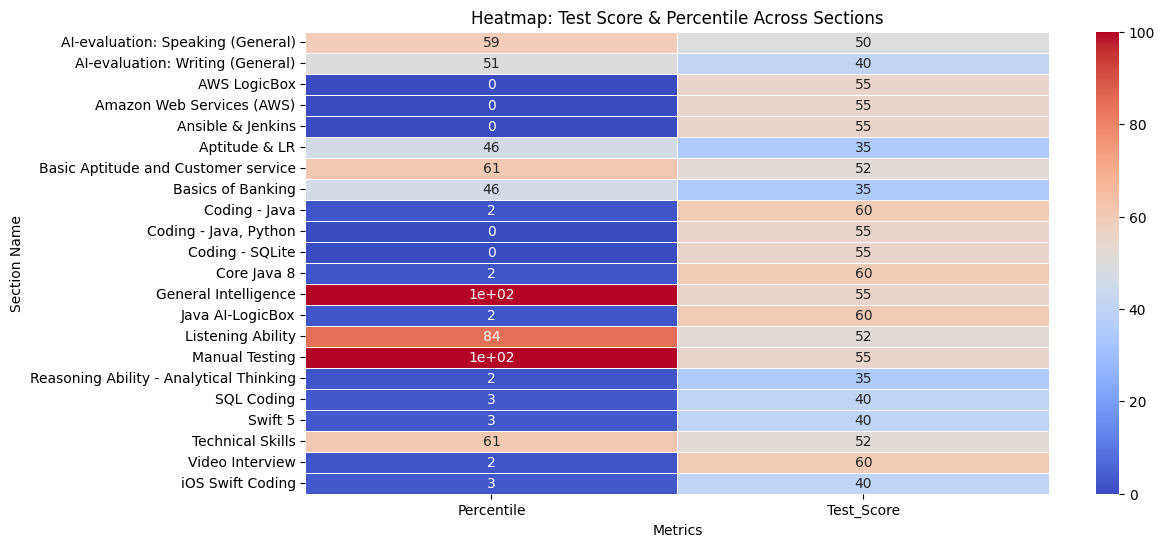

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", linewidths=0.5)

plt.xlabel("Metrics")
plt.ylabel("Section Name")
plt.title("Heatmap: Test Score & Percentile Across Sections")
plt.show()


# 8. Advanced Analysis

## • Question 14: Using the Not_Answered, Answered, Correct, and Wrong columns, analyze the efficiency of the candidates in answering questions.
Task: Create a new column Efficiency = Correct/Answered and calculate the average efficiency.
Bonus: Visualize the efficiency distribution with a histogram or box plot.


In [ ]:
df['Questions'].sum()

5324

In [ ]:
print(df[["Questions","Answered", "Correct", "Wrong", "Not_Answered"]].head())

   Questions  Answered  Correct  Wrong  Not_Answered
0         20        20       12      8             0
1         25        25       17      8             0
2          1         1        1      0             0
3          2         0        0      2             2
4          2         0        0      2             2


In [ ]:
df.to_csv('cleaned_data.csv', index=False)